In [0]:
pip install wordcloud


Python interpreter will be restarted.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-752458aa-d57c-4507-beea-4c01f14d4a4d/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.


In [0]:
pip install nltk

Python interpreter will be restarted.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-752458aa-d57c-4507-beea-4c01f14d4a4d/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.


In [0]:
pip install spacy

Python interpreter will be restarted.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-752458aa-d57c-4507-beea-4c01f14d4a4d/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.


In [0]:
pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.2.0/en_core_web_sm-3.2.0.tar.gz --no-deps

Python interpreter will be restarted.
  Created wheel for en-core-web-sm: filename=en_core_web_sm-3.2.0-py3-none-any.whl size=13900194 sha256=eedcc3599246a7106b5edf2bdf43687db0e2adb5fa5ca36fbaf577d18198a12b
  Stored in directory: /root/.cache/pip/wheels/dd/42/a5/bc03d010e897348c09e48307bbce5d5662d6dd5ab68762b2eb
Successfully built en-core-web-sm
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-752458aa-d57c-4507-beea-4c01f14d4a4d/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.


In [0]:
pip install pyLDAvis


Python interpreter will be restarted.
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136870 sha256=747c58e21da6e68a1b7259be3d90fbd2a17123fd01ad34448286a33a93532589
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491059 sha256=66c7db38b70927d63659fe7269e8e9a3ea6564bcc15d81db8690f82bd2770a39
  Stored in directory: /root/.cache/pip/wheels/8e/70/28/3d6ccd6e315f65f245da085482a2e1c7d14b90b30f239e2cf4
  Created wheel for

In [0]:
import re, nltk, spacy, string

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

## <a id='4'><h2 style="background-color:Lavender;border-radius:5px;text-align:center;padding:7px;color:MediumPurple;font-family:Garamond;">Topic Dashboard<h2></a>

In [0]:
DF = (spark.read
      .option("inferSchema", True).json("/FileStore/tables/Project_Data_Extract/Reviews_Final_Dashboard.json"))
spark.conf.set("spark.sql.execution.arrow.enabled", "false") 
reviews_pdf=DF.toPandas()
#reviews_pdf


In [0]:
reviews_pdf_A=reviews_pdf[reviews_pdf['business_id'].isin(['s7baMoiG1821_3NblCfK6w'])]

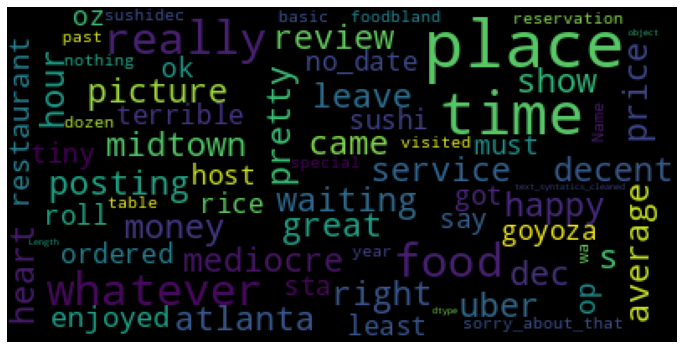

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['figure.figsize']=(12.0,12.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=500,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(reviews_pdf_A['text_syntatics_cleaned']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

In [0]:
import pandas as pd
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(reviews_pdf_A['text_syntatics_cleaned'], 30)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])
df2
fig = go.Figure([go.Bar(x=df2['unigram'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 30 unigrams in the text"))
fig.show()


In [0]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(reviews_pdf_A['text_syntatics_cleaned'], 20)
df3 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])
df3
fig = go.Figure([go.Bar(x=df3['bigram'], y=df3['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 bigrams in text"))
fig.show()

In [0]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(reviews_pdf_A['text_syntatics_cleaned'], 20)
df4 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])
df4
fig = go.Figure([go.Bar(x=df4['trigram'], y=df4['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 trigrams in text"))
fig.show()

In [0]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=3,                        # minimum required occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             max_features=5000,             # max number of unique words. Build a vocabulary that only consider the top max_features ordered by term frequency across the corpus
                            )

data_vectorized = vectorizer.fit_transform(reviews_pdf['text_syntatics_cleaned'])

lda_model = LatentDirichletAllocation(n_components=20, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

/databricks/python/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning:

'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.



In [0]:
DF.write.mode('overwrite').saveAsTable("TopicsTable1")


In [0]:
dbutils.widgets.text("business_filter", "s7baMoiG1821_3NblCfK6w", "Enter your business id:")
dbutils.widgets.text("start_date", "2020-08-20", "Enter start date:")
dbutils.widgets.text("end_date", "2020-12-20", "Enter end date:")



In [0]:
dbutils.widgets.dropdown("stars_filter_above", "1", [str(x) for x in range(1,6)],'Filter rating(More than and equal to):')

In [0]:
dbutils.widgets.dropdown("stars_filter_below", "4", [str(x) for x in range(1,6)],'Filter rating(Less than and equal to):')

In [0]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(data={"Topic_Number":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],"Topics":['Bad Service/Customer Emotions(frustrated)/Payment(money)',
                   'Food&Beverage(cocktail/fruit/fish)/Environment(rooftop/view)',
                   'Paymnent/Good Food(tofu/fish/miso/soup/salmon/sushi/avocado)/Food Portion(small)/Server',
                   'Food Ordering/Food(chicken/sauce)/Service/Temperature(Cold)',
                   'Food(sushi)/Service',
                   'Place/Turf n Surf(main course/seafood/red meat)/Taco/Gluten',
                   'Environment(interior/bar/lighting/Red&Black theme)/Food(sushi/smoked)/Service',
                   'Customer Service/Waiting Time/Payment(refund)',
                   'Group/Waiting Crowd/Time/Rating',
                   'Location/Parking/Food(sushi)',
                   'Medicocre Food/Slow Service/Food(sushi/roll/vegan)',
                   'Service Excellent/Good Food(Taco/smokey salmon/Appetizer)/Amazing place/Pleasure',
                   
                   'Pricing(Overpriced)/Ambience(music)',
                   'Dynamite Food/Service/Food(Scallop)/Food Mediocre',
                   'Payment(Comped)',
                   'Food(Roll/sushi/spicy/fried rice/shrimp/chicken)',
                   'Customer Service/Food/Drinks/Environment(clean)/Place(austin)',
                   'Bad Service/Customer Emotions(frustrated)/Payment(money)',
                   'Service/Waiting Time',
                   'Environment(decor/patio/lighting)/Music']}).reset_index(drop=True)


Topic_Number 
 Topics 
 
 
 
 
 0 
 1 
 Bad Service/Customer Emotions(frustrated)/Payment(money) 
 
 
 1 
 2 
 Food&Beverage(cocktail/fruit/fish)/Environment(rooftop/view) 
 
 
 2 
 3 
 Paymnent/Good Food(tofu/fish/miso/soup/salmon/sushi/avocado)/Food Portion(small)/Server 
 
 
 3 
 4 
 Food Ordering/Food(chicken/sauce)/Service/Temperature(Cold) 
 
 
 4 
 5 
 Food(sushi)/Service 
 
 
 5 
 6 
 Place/Turf n Surf(main course/seafood/red meat)/Taco/Gluten 
 
 
 6 
 7 
 Environment(interior/bar/lighting/Red&Black theme)/Food(sushi/smoked)/Service 
 
 
 7 
 8 
 Customer Service/Waiting Time/Payment(refund) 
 
 
 8 
 9 
 Group/Waiting Crowd/Time/Rating 
 
 
 9 
 10 
 Location/Parking/Food(sushi) 
 
 
 10 
 11 
 Medicocre Food/Slow Service/Food(sushi/roll/vegan) 
 
 
 11 
 12 
 Service Excellent/Good Food(Taco/smokey salmon/Appetizer)/Amazing place/Pleasure 
 
 
 12 
 13 
 Pricing(Overpriced)/Ambience(music) 
 
 
 13 
 14 
 Dynamite Food/Service/Food(Scallop)/Food Mediocre 
 
 
 14 
 15 
 Payment(Comped) 
 
 
 15 
 16 
 Food(Roll/sushi/spicy/fried rice/shrimp/chicken) 
 
 
 16 
 17 
 Customer Service/Food/Drinks/Environment(clean)/Place(austin) 
 
 
 17 
 18 
 Bad Service/Customer Emotions(frustrated)/Payment(money) 
 
 
 18 
 19 
 Service/Waiting Time 
 
 
 19 
 20 
 Environment(decor/patio/lighting)/Music

In [0]:
%sql
SELECT * FROM TopicsTable
WHERE (business_id = getArgument('business_filter'))

Aspect Aspect_AMBIENCE_GENERAL Aspect_DRINKS_PRICES Aspect_DRINKS_STYLE_OPTIONS Aspect_FOOD_PRICES Aspect_FOOD_QUALITY Aspect_FOOD_STYLE_OPTIONS Aspect_Keywords Aspect_LOCATION_GENERAL Aspect_RESTAURANT_GENERAL Aspect_RESTAURANT_MISCELLANEOUS Aspect_RESTAURANT_PRICES Aspect_SENTIMENT_NEGATIVE Aspect_SENTIMENT_NEUTRAL Aspect_SENTIMENT_POSITIVE Aspect_SERVICE_GENERAL Aspect_Sentiment Emotion Emotion_anger Emotion_fear Emotion_joy Emotion_love Emotion_sadness Emotion_suprise Food_Entities Overall_Aspect Personality_ENFJ Personality_ENFP Personality_ENTJ Personality_ENTP Personality_ESFJ Personality_ESFP Personality_ESTJ Personality_ESTP Personality_INFJ Personality_INFP Personality_INTJ Personality_INTP Personality_ISFJ Personality_ISFP Personality_ISTJ Personality_ISTP Topic_11__MedicocreFood__SlowService__Food_sushi_roll_vegan Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__AmazingPlace__Pleasure Topic_16__Payment_Comped Topic_17__Food_Roll_sushi_spicy_friedRice_shrimp_chicken Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin Topic_19__Service_WaitingTime Topic_1__BadService_CustomerEmotions_frustrated_Payment_money Topic_20__Environment_Decor_patio_lighting__Music Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold Topic_5__Food_sushi__Service Topic_6__Place__Food_TurfnSurf_Taco_Gluten Topic_8__CustomerService_WaitingTime_PaymentRefund business_id cool date dominant_topic dominant_topic_theme funny month personality sentiment sentiment_negative sentiment_neutral sentiment_positive sentiment_score stars stars_1 stars_2 stars_3 stars_4 stars_5 text_syntatics_cleaned useful List(RESTAURANT#GENERAL, FOOD#QUALITY, FOOD#QUALITY, SERVICE#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, AMBIENCE#GENERAL, FOOD#QUALITY, FOOD#QUALITY, RESTAURANT#GENERAL, FOOD#QUALITY, FOOD#QUALITY, RESTAURANT#GENERAL) 1 0 0 0 7 0 [uber leave place, pork gyoza chicken yakisoba lobster spring roll chicken teriyaki udon gyoza,cold lobster, roll mehhh let, chicken yakisoba chicken, equally bad, chickeninedible think, chicken prepped frm, chicken breast, definitely lie, ate everything, chicken redeeming quality place, lovely attentive] 0 4 0 0 1 0 0 1 List(negative, neutral, neutral, neutral, neutral, negative, neutral, neutral, neutral, neutral, positive, neutral, neutral, positive) joy 0 0 1 0 0 0 [roll chicken teriyaki gyoza, lobster roll mehhh, chicken yakisoba chicken chicken, chickenchicken breast, everything chicken redeeming] FOOD#QUALITY 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 s7baMoiG1821_3NblCfK6w 0 2019-01-07 3 Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold 0 1 ISFJ positive 0 0 1 0.1796 1 1 0 0 0 0 s I posting review waiting uber leave place ordered pork gyoza chicken yakisoba lobster spring roll chicken teriyaki udon gyozacold lobster roll mehhh let u get awful chicken yakisoba chicken udon equally bad chickeninedible think defrosted bag warmed microwave spoke manager assured chickenprepped frm fresh chicken breast definitely lie starving ate everything around chicken redeeming quality placelovely attentive waitress niyara ra good 0 List(RESTAURANT#GENERAL, RESTAURANT#GENERAL, FOOD#QUALITY, FOOD#QUALITY, RESTAURANT#GENERAL, RESTAURANT#GENERAL) 0 0 0 0 2 0 [came happy, hour great place, show picture food, get salmon nigiri, presentation doe, bar everythingwonderful] 0 4 0 0 0 0 1 0 List(positive, positive, neutral, neutral, neutral, positive) joy 0 0 1 0 0 0 [salmon nigiri, doe flair bar] AMBIENCE#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2019-01-16 17 Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin 0 1 ISFP positive 0 0 1 0.9403 5 0 0 0 0 1 came happy hour great place show picture food devoured get salmon nigiri also ralollipo

In [0]:
%sql
SELECT * FROM TopicsTable
WHERE (date BETWEEN getArgument('start_date') AND getArgument('end_date')) AND (business_id = getArgument('business_filter'))

Aspect Aspect_AMBIENCE_GENERAL Aspect_DRINKS_PRICES Aspect_DRINKS_STYLE_OPTIONS Aspect_FOOD_PRICES Aspect_FOOD_QUALITY Aspect_FOOD_STYLE_OPTIONS Aspect_Keywords Aspect_LOCATION_GENERAL Aspect_RESTAURANT_GENERAL Aspect_RESTAURANT_MISCELLANEOUS Aspect_RESTAURANT_PRICES Aspect_SENTIMENT_NEGATIVE Aspect_SENTIMENT_NEUTRAL Aspect_SENTIMENT_POSITIVE Aspect_SERVICE_GENERAL Aspect_Sentiment Emotion Emotion_anger Emotion_fear Emotion_joy Emotion_love Emotion_sadness Emotion_suprise Food_Entities Overall_Aspect Personality_ENFJ Personality_ENFP Personality_ENTJ Personality_ENTP Personality_ESFJ Personality_ESFP Personality_ESTJ Personality_ESTP Personality_INFJ Personality_INFP Personality_INTJ Personality_INTP Personality_ISFJ Personality_ISFP Personality_ISTJ Personality_ISTP Topic_11__MedicocreFood__SlowService__Food_sushi_roll_vegan Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__AmazingPlace__Pleasure Topic_16__Payment_Comped Topic_17__Food_Roll_sushi_spicy_friedRice_shrimp_chicken Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin Topic_19__Service_WaitingTime Topic_1__BadService_CustomerEmotions_frustrated_Payment_money Topic_20__Environment_Decor_patio_lighting__Music Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold Topic_5__Food_sushi__Service Topic_6__Place__Food_TurfnSurf_Taco_Gluten Topic_8__CustomerService_WaitingTime_PaymentRefund business_id cool date dominant_topic dominant_topic_theme funny month personality sentiment sentiment_negative sentiment_neutral sentiment_positive sentiment_score stars stars_1 stars_2 stars_3 stars_4 stars_5 text_syntatics_cleaned useful List(RESTAURANT#GENERAL, FOOD#STYLE_OPTIONS, SERVICE#GENERAL) 0 0 0 0 0 1 [never came, shrimp tempura, minute shaking_my_head] 0 1 0 0 0 1 0 1 List(neutral, neutral, neutral) joy 0 0 1 0 0 0 [sushi shrimp tempura] FOOD#QUALITY 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-08-23 16 Topic_17__Food_Roll_sushi_spicy_fried rice_shrimp_chicken 0 8 ISTP negative 1 0 0 -0.3875 1 1 0 0 0 0 sushi never came friend shrimp tempura I still waiting done eating minute shaking_my_head 1 List(SERVICE#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, SERVICE#GENERAL, FOOD#QUALITY) 0 0 0 0 2 0 [service food well prepared, invite guest eat, must try, poke bowl bar service,amazing] 0 1 0 0 0 1 0 2 List(neutral, neutral, positive, positive, neutral, neutral, positive) joy 0 0 1 0 0 0 [poke bowl bar] RESTAURANT#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-08-27 17 Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin 0 8 ISFP positive 0 0 1 0.8074 5 0 0 0 0 1 serviceamazing attentive foodfresh well prepared would happy invite guest eat must try garlic edamame poke bowl bar serviceamazing 0 List(RESTAURANT#GENERAL, SERVICE#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, RESTAURANT#GENERAL, RESTAURANT#PRICES, RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL) 0 0 0 0 0 0 [plenty open table, yet multiple, staff front, seating last time, safer dining option covid waitress, admittedly new, continually pulled, food hour price, significantly understand, would expect, pat year] 0 6 0 0 0 1 0 4 List(neutral, neutral, neutral, neutral, neutral, positive, neutral, neutral, neutral, neutral, neutral, neutral, neutral) joy 0 0 1 0 0 0 [] SERVICE#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-08-28 18 Topic_19__Service_WaitingTime 0 8 ISTJ positive 0 0 1 0.8614 2 0 1 0 0 0 ra midtown ha really gone downhill past time come ha one waiting plenty open table yet multiple staff front seem otherwise occupied acknowledge anyone waiting seated outdoor seatingclosed last time despite safer dining o

In [0]:
%sql
SELECT * FROM TopicsTable
WHERE (date BETWEEN getArgument('start_date') AND getArgument('end_date')) AND (business_id = getArgument('business_filter'))

Aspect Aspect_AMBIENCE_GENERAL Aspect_DRINKS_PRICES Aspect_DRINKS_STYLE_OPTIONS Aspect_FOOD_PRICES Aspect_FOOD_QUALITY Aspect_FOOD_STYLE_OPTIONS Aspect_Keywords Aspect_LOCATION_GENERAL Aspect_RESTAURANT_GENERAL Aspect_RESTAURANT_MISCELLANEOUS Aspect_RESTAURANT_PRICES Aspect_SENTIMENT_NEGATIVE Aspect_SENTIMENT_NEUTRAL Aspect_SENTIMENT_POSITIVE Aspect_SERVICE_GENERAL Aspect_Sentiment Emotion Emotion_anger Emotion_fear Emotion_joy Emotion_love Emotion_sadness Emotion_suprise Food_Entities Overall_Aspect Personality_ENFJ Personality_ENFP Personality_ENTJ Personality_ENTP Personality_ESFJ Personality_ESFP Personality_ESTJ Personality_ESTP Personality_INFJ Personality_INFP Personality_INTJ Personality_INTP Personality_ISFJ Personality_ISFP Personality_ISTJ Personality_ISTP Topic_11__MedicocreFood__SlowService__Food_sushi_roll_vegan Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__AmazingPlace__Pleasure Topic_16__Payment_Comped Topic_17__Food_Roll_sushi_spicy_friedRice_shrimp_chicken Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin Topic_19__Service_WaitingTime Topic_1__BadService_CustomerEmotions_frustrated_Payment_money Topic_20__Environment_Decor_patio_lighting__Music Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold Topic_5__Food_sushi__Service Topic_6__Place__Food_TurfnSurf_Taco_Gluten Topic_8__CustomerService_WaitingTime_PaymentRefund business_id cool date dominant_topic dominant_topic_theme funny month personality sentiment sentiment_negative sentiment_neutral sentiment_positive sentiment_score stars stars_1 stars_2 stars_3 stars_4 stars_5 text_syntatics_cleaned useful List(RESTAURANT#GENERAL, FOOD#STYLE_OPTIONS, SERVICE#GENERAL) 0 0 0 0 0 1 [never came, shrimp tempura, minute shaking_my_head] 0 1 0 0 0 1 0 1 List(neutral, neutral, neutral) joy 0 0 1 0 0 0 [sushi shrimp tempura] FOOD#QUALITY 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-08-23 16 Topic_17__Food_Roll_sushi_spicy_fried rice_shrimp_chicken 0 8 ISTP negative 1 0 0 -0.3875 1 1 0 0 0 0 sushi never came friend shrimp tempura I still waiting done eating minute shaking_my_head 1 List(SERVICE#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, SERVICE#GENERAL, FOOD#QUALITY) 0 0 0 0 2 0 [service food well prepared, invite guest eat, must try, poke bowl bar service,amazing] 0 1 0 0 0 1 0 2 List(neutral, neutral, positive, positive, neutral, neutral, positive) joy 0 0 1 0 0 0 [poke bowl bar] RESTAURANT#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-08-27 17 Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin 0 8 ISFP positive 0 0 1 0.8074 5 0 0 0 0 1 serviceamazing attentive foodfresh well prepared would happy invite guest eat must try garlic edamame poke bowl bar serviceamazing 0 List(RESTAURANT#GENERAL, SERVICE#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, RESTAURANT#GENERAL, RESTAURANT#PRICES, RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL) 0 0 0 0 0 0 [plenty open table, yet multiple, staff front, seating last time, safer dining option covid waitress, admittedly new, continually pulled, food hour price, significantly understand, would expect, pat year] 0 6 0 0 0 1 0 4 List(neutral, neutral, neutral, neutral, neutral, positive, neutral, neutral, neutral, neutral, neutral, neutral, neutral) joy 0 0 1 0 0 0 [] SERVICE#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-08-28 18 Topic_19__Service_WaitingTime 0 8 ISTJ positive 0 0 1 0.8614 2 0 1 0 0 0 ra midtown ha really gone downhill past time come ha one waiting plenty open table yet multiple staff front seem otherwise occupied acknowledge anyone waiting seated outdoor seatingclosed last time despite safer dining o

In [0]:
%sql
SELECT * FROM TopicsTable
WHERE (date BETWEEN getArgument('start_date') AND getArgument('end_date')) AND (business_id = getArgument('business_filter'))

Aspect Aspect_AMBIENCE_GENERAL Aspect_DRINKS_PRICES Aspect_DRINKS_STYLE_OPTIONS Aspect_FOOD_PRICES Aspect_FOOD_QUALITY Aspect_FOOD_STYLE_OPTIONS Aspect_Keywords Aspect_LOCATION_GENERAL Aspect_RESTAURANT_GENERAL Aspect_RESTAURANT_MISCELLANEOUS Aspect_RESTAURANT_PRICES Aspect_SENTIMENT_NEGATIVE Aspect_SENTIMENT_NEUTRAL Aspect_SENTIMENT_POSITIVE Aspect_SERVICE_GENERAL Aspect_Sentiment Emotion Emotion_anger Emotion_fear Emotion_joy Emotion_love Emotion_sadness Emotion_suprise Food_Entities Overall_Aspect Personality_ENFJ Personality_ENFP Personality_ENTJ Personality_ENTP Personality_ESFJ Personality_ESFP Personality_ESTJ Personality_ESTP Personality_INFJ Personality_INFP Personality_INTJ Personality_INTP Personality_ISFJ Personality_ISFP Personality_ISTJ Personality_ISTP Topic_11__MedicocreFood__SlowService__Food_sushi_roll_vegan Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__AmazingPlace__Pleasure Topic_16__Payment_Comped Topic_17__Food_Roll_sushi_spicy_friedRice_shrimp_chicken Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin Topic_19__Service_WaitingTime Topic_1__BadService_CustomerEmotions_frustrated_Payment_money Topic_20__Environment_Decor_patio_lighting__Music Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold Topic_5__Food_sushi__Service Topic_6__Place__Food_TurfnSurf_Taco_Gluten Topic_8__CustomerService_WaitingTime_PaymentRefund business_id cool date dominant_topic dominant_topic_theme funny month personality sentiment sentiment_negative sentiment_neutral sentiment_positive sentiment_score stars stars_1 stars_2 stars_3 stars_4 stars_5 text_syntatics_cleaned useful List(RESTAURANT#GENERAL, FOOD#STYLE_OPTIONS, SERVICE#GENERAL) 0 0 0 0 0 1 [never came, shrimp tempura, minute shaking_my_head] 0 1 0 0 0 1 0 1 List(neutral, neutral, neutral) joy 0 0 1 0 0 0 [sushi shrimp tempura] FOOD#QUALITY 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-08-23 16 Topic_17__Food_Roll_sushi_spicy_fried rice_shrimp_chicken 0 8 ISTP negative 1 0 0 -0.3875 1 1 0 0 0 0 sushi never came friend shrimp tempura I still waiting done eating minute shaking_my_head 1 List(SERVICE#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, SERVICE#GENERAL, FOOD#QUALITY) 0 0 0 0 2 0 [service food well prepared, invite guest eat, must try, poke bowl bar service,amazing] 0 1 0 0 0 1 0 2 List(neutral, neutral, positive, positive, neutral, neutral, positive) joy 0 0 1 0 0 0 [poke bowl bar] RESTAURANT#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-08-27 17 Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin 0 8 ISFP positive 0 0 1 0.8074 5 0 0 0 0 1 serviceamazing attentive foodfresh well prepared would happy invite guest eat must try garlic edamame poke bowl bar serviceamazing 0 List(RESTAURANT#GENERAL, SERVICE#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, RESTAURANT#GENERAL, RESTAURANT#PRICES, RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL) 0 0 0 0 0 0 [plenty open table, yet multiple, staff front, seating last time, safer dining option covid waitress, admittedly new, continually pulled, food hour price, significantly understand, would expect, pat year] 0 6 0 0 0 1 0 4 List(neutral, neutral, neutral, neutral, neutral, positive, neutral, neutral, neutral, neutral, neutral, neutral, neutral) joy 0 0 1 0 0 0 [] SERVICE#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-08-28 18 Topic_19__Service_WaitingTime 0 8 ISTJ positive 0 0 1 0.8614 2 0 1 0 0 0 ra midtown ha really gone downhill past time come ha one waiting plenty open table yet multiple staff front seem otherwise occupied acknowledge anyone waiting seated outdoor seatingclosed last time despite safer dining o

In [0]:
%sql
SELECT * FROM TopicsTable
WHERE (date BETWEEN getArgument('start_date') AND getArgument('end_date')) AND (business_id = getArgument('business_filter'))

Aspect Aspect_AMBIENCE_GENERAL Aspect_DRINKS_PRICES Aspect_DRINKS_STYLE_OPTIONS Aspect_FOOD_PRICES Aspect_FOOD_QUALITY Aspect_FOOD_STYLE_OPTIONS Aspect_Keywords Aspect_LOCATION_GENERAL Aspect_RESTAURANT_GENERAL Aspect_RESTAURANT_MISCELLANEOUS Aspect_RESTAURANT_PRICES Aspect_SENTIMENT_NEGATIVE Aspect_SENTIMENT_NEUTRAL Aspect_SENTIMENT_POSITIVE Aspect_SERVICE_GENERAL Aspect_Sentiment Emotion Emotion_anger Emotion_fear Emotion_joy Emotion_love Emotion_sadness Emotion_suprise Food_Entities Overall_Aspect Personality_ENFJ Personality_ENFP Personality_ENTJ Personality_ENTP Personality_ESFJ Personality_ESFP Personality_ESTJ Personality_ESTP Personality_INFJ Personality_INFP Personality_INTJ Personality_INTP Personality_ISFJ Personality_ISFP Personality_ISTJ Personality_ISTP Topic_11__MedicocreFood__SlowService__Food_sushi_roll_vegan Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__AmazingPlace__Pleasure Topic_16__Payment_Comped Topic_17__Food_Roll_sushi_spicy_friedRice_shrimp_chicken Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin Topic_19__Service_WaitingTime Topic_1__BadService_CustomerEmotions_frustrated_Payment_money Topic_20__Environment_Decor_patio_lighting__Music Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold Topic_5__Food_sushi__Service Topic_6__Place__Food_TurfnSurf_Taco_Gluten Topic_8__CustomerService_WaitingTime_PaymentRefund business_id cool date dominant_topic dominant_topic_theme funny month personality sentiment sentiment_negative sentiment_neutral sentiment_positive sentiment_score stars stars_1 stars_2 stars_3 stars_4 stars_5 text_syntatics_cleaned useful List(RESTAURANT#GENERAL, FOOD#STYLE_OPTIONS, SERVICE#GENERAL) 0 0 0 0 0 1 [never came, shrimp tempura, minute shaking_my_head] 0 1 0 0 0 1 0 1 List(neutral, neutral, neutral) joy 0 0 1 0 0 0 [sushi shrimp tempura] FOOD#QUALITY 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-08-23 16 Topic_17__Food_Roll_sushi_spicy_fried rice_shrimp_chicken 0 8 ISTP negative 1 0 0 -0.3875 1 1 0 0 0 0 sushi never came friend shrimp tempura I still waiting done eating minute shaking_my_head 1 List(SERVICE#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, SERVICE#GENERAL, FOOD#QUALITY) 0 0 0 0 2 0 [service food well prepared, invite guest eat, must try, poke bowl bar service,amazing] 0 1 0 0 0 1 0 2 List(neutral, neutral, positive, positive, neutral, neutral, positive) joy 0 0 1 0 0 0 [poke bowl bar] RESTAURANT#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-08-27 17 Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin 0 8 ISFP positive 0 0 1 0.8074 5 0 0 0 0 1 serviceamazing attentive foodfresh well prepared would happy invite guest eat must try garlic edamame poke bowl bar serviceamazing 0 List(RESTAURANT#GENERAL, SERVICE#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, RESTAURANT#GENERAL, RESTAURANT#PRICES, RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL) 0 0 0 0 0 0 [plenty open table, yet multiple, staff front, seating last time, safer dining option covid waitress, admittedly new, continually pulled, food hour price, significantly understand, would expect, pat year] 0 6 0 0 0 1 0 4 List(neutral, neutral, neutral, neutral, neutral, positive, neutral, neutral, neutral, neutral, neutral, neutral, neutral) joy 0 0 1 0 0 0 [] SERVICE#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-08-28 18 Topic_19__Service_WaitingTime 0 8 ISTJ positive 0 0 1 0.8614 2 0 1 0 0 0 ra midtown ha really gone downhill past time come ha one waiting plenty open table yet multiple staff front seem otherwise occupied acknowledge anyone waiting seated outdoor seatingclosed last time despite safer dining o

In [0]:
%sql
SELECT * FROM TopicsTable1
WHERE (date BETWEEN getArgument('start_date') AND getArgument('end_date')) AND (business_id = getArgument('business_filter'))

Aspect Aspect_AMBIENCE_GENERAL Aspect_DRINKS_PRICES Aspect_DRINKS_STYLE_OPTIONS Aspect_FOOD_PRICES Aspect_FOOD_QUALITY Aspect_FOOD_STYLE_OPTIONS Aspect_Keywords Aspect_LOCATION_GENERAL Aspect_RESTAURANT_GENERAL Aspect_RESTAURANT_MISCELLANEOUS Aspect_RESTAURANT_PRICES Aspect_SENTIMENT_NEGATIVE Aspect_SENTIMENT_NEUTRAL Aspect_SENTIMENT_POSITIVE Aspect_SERVICE_GENERAL Aspect_Sentiment Emotion Emotion_anger Emotion_fear Emotion_joy Emotion_love Emotion_sadness Emotion_suprise Food_Entities Food_Entities_Cleaned Overall_Aspect Personality_ENFJ Personality_ENFP Personality_ENTJ Personality_ENTP Personality_ESFJ Personality_ESFP Personality_ESTJ Personality_ESTP Personality_INFJ Personality_INFP Personality_INTJ Personality_INTP Personality_ISFJ Personality_ISFP Personality_ISTJ Personality_ISTP Topic_11__MedicocreFood__SlowService__Food_sushi_roll_vegan Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__AmazingPlace__Pleasure Topic_16__Payment_Comped Topic_17__Food_Roll_sushi_spicy_friedRice_shrimp_chicken Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin Topic_19__Service_WaitingTime Topic_1__BadService_CustomerEmotions_frustrated_Payment_money Topic_20__Environment_Decor_patio_lighting__Music Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold Topic_5__Food_sushi__Service Topic_6__Place__Food_TurfnSurf_Taco_Gluten Topic_8__CustomerService_WaitingTime_PaymentRefund business_id cool date dominant_topic dominant_topic_theme funny month personality sentiment sentiment_negative sentiment_neutral sentiment_positive sentiment_score stars stars_1 stars_2 stars_3 stars_4 stars_5 text_syntatics_cleaned useful List(RESTAURANT#GENERAL, FOOD#STYLE_OPTIONS, SERVICE#GENERAL) 0 0 0 0 0 1 [never came, shrimp tempura, minute shaking_my_head] 0 1 0 0 0 1 0 1 List(neutral, neutral, neutral) joy 0 0 1 0 0 0 [sushi shrimp tempura] List(sushi, shrimptempu) FOOD#QUALITY 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-08-23 16 Topic_17__Food_Roll_sushi_spicy_fried rice_shrimp_chicken 0 8 ISTP negative 1 0 0 -0.3875 1 1 0 0 0 0 sushi never came friend shrimp tempura I still waiting done eating minute shaking_my_head 1 List(SERVICE#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, SERVICE#GENERAL, FOOD#QUALITY) 0 0 0 0 2 0 [service food well prepared, invite guest eat, must try, poke bowl bar service,amazing] 0 1 0 0 0 1 0 2 List(neutral, neutral, positive, positive, neutral, neutral, positive) joy 0 0 1 0 0 0 [poke bowl bar] List(pokebowl) RESTAURANT#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-08-27 17 Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin 0 8 ISFP positive 0 0 1 0.8074 5 0 0 0 0 1 serviceamazing attentive foodfresh well prepared would happy invite guest eat must try garlic edamame poke bowl bar serviceamazing 0 List(RESTAURANT#GENERAL, SERVICE#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, RESTAURANT#GENERAL, RESTAURANT#PRICES, RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL) 0 0 0 0 0 0 [plenty open table, yet multiple, staff front, seating last time, safer dining option covid waitress, admittedly new, continually pulled, food hour price, significantly understand, would expect, pat year] 0 6 0 0 0 1 0 4 List(neutral, neutral, neutral, neutral, neutral, positive, neutral, neutral, neutral, neutral, neutral, neutral, neutral) joy 0 0 1 0 0 0 [] List() SERVICE#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-08-28 18 Topic_19__Service_WaitingTime 0 8 ISTJ positive 0 0 1 0.8614 2 0 1 0 0 0 ra midtown ha really gone downhill past time come ha one waiting plenty open table yet multiple staff front seem otherwise occupied acknowledge anyone 

In [0]:
%sql
SELECT * FROM TopicsTable
WHERE (date BETWEEN getArgument('start_date') AND getArgument('end_date')) AND (business_id = getArgument('business_filter'))


Aspect Aspect_AMBIENCE_GENERAL Aspect_DRINKS_PRICES Aspect_DRINKS_STYLE_OPTIONS Aspect_FOOD_PRICES Aspect_FOOD_QUALITY Aspect_FOOD_STYLE_OPTIONS Aspect_Keywords Aspect_LOCATION_GENERAL Aspect_RESTAURANT_GENERAL Aspect_RESTAURANT_MISCELLANEOUS Aspect_RESTAURANT_PRICES Aspect_SENTIMENT_NEGATIVE Aspect_SENTIMENT_NEUTRAL Aspect_SENTIMENT_POSITIVE Aspect_SERVICE_GENERAL Aspect_Sentiment Emotion Emotion_anger Emotion_fear Emotion_joy Emotion_love Emotion_sadness Emotion_suprise Food_Entities Overall_Aspect Personality_ENFJ Personality_ENFP Personality_ENTJ Personality_ENTP Personality_ESFJ Personality_ESFP Personality_ESTJ Personality_ESTP Personality_INFJ Personality_INFP Personality_INTJ Personality_INTP Personality_ISFJ Personality_ISFP Personality_ISTJ Personality_ISTP Topic_11__MedicocreFood__SlowService__Food_sushi_roll_vegan Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__AmazingPlace__Pleasure Topic_16__Payment_Comped Topic_17__Food_Roll_sushi_spicy_friedRice_shrimp_chicken Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin Topic_19__Service_WaitingTime Topic_1__BadService_CustomerEmotions_frustrated_Payment_money Topic_20__Environment_Decor_patio_lighting__Music Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold Topic_5__Food_sushi__Service Topic_6__Place__Food_TurfnSurf_Taco_Gluten Topic_8__CustomerService_WaitingTime_PaymentRefund business_id cool date dominant_topic dominant_topic_theme funny month personality sentiment sentiment_negative sentiment_neutral sentiment_positive sentiment_score stars stars_1 stars_2 stars_3 stars_4 stars_5 text_syntatics_cleaned useful List(RESTAURANT#GENERAL, FOOD#STYLE_OPTIONS, SERVICE#GENERAL) 0 0 0 0 0 1 [never came, shrimp tempura, minute shaking_my_head] 0 1 0 0 0 1 0 1 List(neutral, neutral, neutral) joy 0 0 1 0 0 0 [sushi shrimp tempura] FOOD#QUALITY 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-08-23 16 Topic_17__Food_Roll_sushi_spicy_fried rice_shrimp_chicken 0 8 ISTP negative 1 0 0 -0.3875 1 1 0 0 0 0 sushi never came friend shrimp tempura I still waiting done eating minute shaking_my_head 1 List(SERVICE#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, SERVICE#GENERAL, FOOD#QUALITY) 0 0 0 0 2 0 [service food well prepared, invite guest eat, must try, poke bowl bar service,amazing] 0 1 0 0 0 1 0 2 List(neutral, neutral, positive, positive, neutral, neutral, positive) joy 0 0 1 0 0 0 [poke bowl bar] RESTAURANT#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-08-27 17 Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin 0 8 ISFP positive 0 0 1 0.8074 5 0 0 0 0 1 serviceamazing attentive foodfresh well prepared would happy invite guest eat must try garlic edamame poke bowl bar serviceamazing 0 List(RESTAURANT#GENERAL, SERVICE#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, RESTAURANT#GENERAL, RESTAURANT#PRICES, RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL) 0 0 0 0 0 0 [plenty open table, yet multiple, staff front, seating last time, safer dining option covid waitress, admittedly new, continually pulled, food hour price, significantly understand, would expect, pat year] 0 6 0 0 0 1 0 4 List(neutral, neutral, neutral, neutral, neutral, positive, neutral, neutral, neutral, neutral, neutral, neutral, neutral) joy 0 0 1 0 0 0 [] SERVICE#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-08-28 18 Topic_19__Service_WaitingTime 0 8 ISTJ positive 0 0 1 0.8614 2 0 1 0 0 0 ra midtown ha really gone downhill past time come ha one waiting plenty open table yet multiple staff front seem otherwise occupied acknowledge anyone waiting seated outdoor seatingclosed last time despite safer dining o

In [0]:
%sql
SELECT * FROM TopicsTable
WHERE (date BETWEEN getArgument('start_date') AND getArgument('end_date')) AND (business_id = getArgument('business_filter'))


Aspect Aspect_AMBIENCE_GENERAL Aspect_DRINKS_PRICES Aspect_DRINKS_STYLE_OPTIONS Aspect_FOOD_PRICES Aspect_FOOD_QUALITY Aspect_FOOD_STYLE_OPTIONS Aspect_Keywords Aspect_LOCATION_GENERAL Aspect_RESTAURANT_GENERAL Aspect_RESTAURANT_MISCELLANEOUS Aspect_RESTAURANT_PRICES Aspect_SENTIMENT_NEGATIVE Aspect_SENTIMENT_NEUTRAL Aspect_SENTIMENT_POSITIVE Aspect_SERVICE_GENERAL Aspect_Sentiment Emotion Emotion_anger Emotion_fear Emotion_joy Emotion_love Emotion_sadness Emotion_suprise Food_Entities Overall_Aspect Personality_ENFJ Personality_ENFP Personality_ENTJ Personality_ENTP Personality_ESFJ Personality_ESFP Personality_ESTJ Personality_ESTP Personality_INFJ Personality_INFP Personality_INTJ Personality_INTP Personality_ISFJ Personality_ISFP Personality_ISTJ Personality_ISTP Topic_11__MedicocreFood__SlowService__Food_sushi_roll_vegan Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__AmazingPlace__Pleasure Topic_16__Payment_Comped Topic_17__Food_Roll_sushi_spicy_friedRice_shrimp_chicken Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin Topic_19__Service_WaitingTime Topic_1__BadService_CustomerEmotions_frustrated_Payment_money Topic_20__Environment_Decor_patio_lighting__Music Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold Topic_5__Food_sushi__Service Topic_6__Place__Food_TurfnSurf_Taco_Gluten Topic_8__CustomerService_WaitingTime_PaymentRefund business_id cool date dominant_topic dominant_topic_theme funny month personality sentiment sentiment_negative sentiment_neutral sentiment_positive sentiment_score stars stars_1 stars_2 stars_3 stars_4 stars_5 text_syntatics_cleaned useful List(RESTAURANT#GENERAL, FOOD#STYLE_OPTIONS, SERVICE#GENERAL) 0 0 0 0 0 1 [never came, shrimp tempura, minute shaking_my_head] 0 1 0 0 0 1 0 1 List(neutral, neutral, neutral) joy 0 0 1 0 0 0 [sushi shrimp tempura] FOOD#QUALITY 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-08-23 16 Topic_17__Food_Roll_sushi_spicy_fried rice_shrimp_chicken 0 8 ISTP negative 1 0 0 -0.3875 1 1 0 0 0 0 sushi never came friend shrimp tempura I still waiting done eating minute shaking_my_head 1 List(SERVICE#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, SERVICE#GENERAL, FOOD#QUALITY) 0 0 0 0 2 0 [service food well prepared, invite guest eat, must try, poke bowl bar service,amazing] 0 1 0 0 0 1 0 2 List(neutral, neutral, positive, positive, neutral, neutral, positive) joy 0 0 1 0 0 0 [poke bowl bar] RESTAURANT#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-08-27 17 Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin 0 8 ISFP positive 0 0 1 0.8074 5 0 0 0 0 1 serviceamazing attentive foodfresh well prepared would happy invite guest eat must try garlic edamame poke bowl bar serviceamazing 0 List(RESTAURANT#GENERAL, SERVICE#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, RESTAURANT#GENERAL, RESTAURANT#PRICES, RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL) 0 0 0 0 0 0 [plenty open table, yet multiple, staff front, seating last time, safer dining option covid waitress, admittedly new, continually pulled, food hour price, significantly understand, would expect, pat year] 0 6 0 0 0 1 0 4 List(neutral, neutral, neutral, neutral, neutral, positive, neutral, neutral, neutral, neutral, neutral, neutral, neutral) joy 0 0 1 0 0 0 [] SERVICE#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-08-28 18 Topic_19__Service_WaitingTime 0 8 ISTJ positive 0 0 1 0.8614 2 0 1 0 0 0 ra midtown ha really gone downhill past time come ha one waiting plenty open table yet multiple staff front seem otherwise occupied acknowledge anyone waiting seated outdoor seatingclosed last time despite safer dining o

In [0]:
%sql
SELECT * FROM TopicsTable1
WHERE (date BETWEEN getArgument('start_date') AND getArgument('end_date')) AND (business_id = getArgument('business_filter'))


Aspect Aspect_AMBIENCE_GENERAL Aspect_DRINKS_PRICES Aspect_DRINKS_STYLE_OPTIONS Aspect_FOOD_PRICES Aspect_FOOD_QUALITY Aspect_FOOD_STYLE_OPTIONS Aspect_Keywords Aspect_LOCATION_GENERAL Aspect_RESTAURANT_GENERAL Aspect_RESTAURANT_MISCELLANEOUS Aspect_RESTAURANT_PRICES Aspect_SENTIMENT_NEGATIVE Aspect_SENTIMENT_NEUTRAL Aspect_SENTIMENT_POSITIVE Aspect_SERVICE_GENERAL Aspect_Sentiment Emotion Emotion_anger Emotion_fear Emotion_joy Emotion_love Emotion_sadness Emotion_suprise Food_Entities Food_Entities_Cleaned Overall_Aspect Personality_ENFJ Personality_ENFP Personality_ENTJ Personality_ENTP Personality_ESFJ Personality_ESFP Personality_ESTJ Personality_ESTP Personality_INFJ Personality_INFP Personality_INTJ Personality_INTP Personality_ISFJ Personality_ISFP Personality_ISTJ Personality_ISTP Topic_11__MedicocreFood__SlowService__Food_sushi_roll_vegan Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__AmazingPlace__Pleasure Topic_16__Payment_Comped Topic_17__Food_Roll_sushi_spicy_friedRice_shrimp_chicken Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin Topic_19__Service_WaitingTime Topic_1__BadService_CustomerEmotions_frustrated_Payment_money Topic_20__Environment_Decor_patio_lighting__Music Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold Topic_5__Food_sushi__Service Topic_6__Place__Food_TurfnSurf_Taco_Gluten Topic_8__CustomerService_WaitingTime_PaymentRefund business_id cool date dominant_topic dominant_topic_theme funny month personality sentiment sentiment_negative sentiment_neutral sentiment_positive sentiment_score stars stars_1 stars_2 stars_3 stars_4 stars_5 text_syntatics_cleaned useful List(RESTAURANT#GENERAL, FOOD#STYLE_OPTIONS, SERVICE#GENERAL) 0 0 0 0 0 1 [never came, shrimp tempura, minute shaking_my_head] 0 1 0 0 0 1 0 1 List(neutral, neutral, neutral) joy 0 0 1 0 0 0 [sushi shrimp tempura] List(sushi, shrimptempu) FOOD#QUALITY 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-08-23 16 Topic_17__Food_Roll_sushi_spicy_fried rice_shrimp_chicken 0 8 ISTP negative 1 0 0 -0.3875 1 1 0 0 0 0 sushi never came friend shrimp tempura I still waiting done eating minute shaking_my_head 1 List(SERVICE#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, SERVICE#GENERAL, FOOD#QUALITY) 0 0 0 0 2 0 [service food well prepared, invite guest eat, must try, poke bowl bar service,amazing] 0 1 0 0 0 1 0 2 List(neutral, neutral, positive, positive, neutral, neutral, positive) joy 0 0 1 0 0 0 [poke bowl bar] List(pokebowl) RESTAURANT#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-08-27 17 Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin 0 8 ISFP positive 0 0 1 0.8074 5 0 0 0 0 1 serviceamazing attentive foodfresh well prepared would happy invite guest eat must try garlic edamame poke bowl bar serviceamazing 0 List(RESTAURANT#GENERAL, SERVICE#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, RESTAURANT#GENERAL, RESTAURANT#PRICES, RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL) 0 0 0 0 0 0 [plenty open table, yet multiple, staff front, seating last time, safer dining option covid waitress, admittedly new, continually pulled, food hour price, significantly understand, would expect, pat year] 0 6 0 0 0 1 0 4 List(neutral, neutral, neutral, neutral, neutral, positive, neutral, neutral, neutral, neutral, neutral, neutral, neutral) joy 0 0 1 0 0 0 [] List() SERVICE#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-08-28 18 Topic_19__Service_WaitingTime 0 8 ISTJ positive 0 0 1 0.8614 2 0 1 0 0 0 ra midtown ha really gone downhill past time come ha one waiting plenty open table yet multiple staff front seem otherwise occupied acknowledge anyone 

In [0]:
%sql
SELECT * FROM TopicsTable
WHERE (date BETWEEN getArgument('start_date') AND getArgument('end_date')) AND (business_id = getArgument('business_filter'))


Aspect Aspect_AMBIENCE_GENERAL Aspect_DRINKS_PRICES Aspect_DRINKS_STYLE_OPTIONS Aspect_FOOD_PRICES Aspect_FOOD_QUALITY Aspect_FOOD_STYLE_OPTIONS Aspect_Keywords Aspect_LOCATION_GENERAL Aspect_RESTAURANT_GENERAL Aspect_RESTAURANT_MISCELLANEOUS Aspect_RESTAURANT_PRICES Aspect_SENTIMENT_NEGATIVE Aspect_SENTIMENT_NEUTRAL Aspect_SENTIMENT_POSITIVE Aspect_SERVICE_GENERAL Aspect_Sentiment Emotion Emotion_anger Emotion_fear Emotion_joy Emotion_love Emotion_sadness Emotion_suprise Food_Entities Overall_Aspect Personality_ENFJ Personality_ENFP Personality_ENTJ Personality_ENTP Personality_ESFJ Personality_ESFP Personality_ESTJ Personality_ESTP Personality_INFJ Personality_INFP Personality_INTJ Personality_INTP Personality_ISFJ Personality_ISFP Personality_ISTJ Personality_ISTP Topic_11__MedicocreFood__SlowService__Food_sushi_roll_vegan Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__AmazingPlace__Pleasure Topic_16__Payment_Comped Topic_17__Food_Roll_sushi_spicy_friedRice_shrimp_chicken Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin Topic_19__Service_WaitingTime Topic_1__BadService_CustomerEmotions_frustrated_Payment_money Topic_20__Environment_Decor_patio_lighting__Music Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold Topic_5__Food_sushi__Service Topic_6__Place__Food_TurfnSurf_Taco_Gluten Topic_8__CustomerService_WaitingTime_PaymentRefund business_id cool date dominant_topic dominant_topic_theme funny month personality sentiment sentiment_negative sentiment_neutral sentiment_positive sentiment_score stars stars_1 stars_2 stars_3 stars_4 stars_5 text_syntatics_cleaned useful List(RESTAURANT#GENERAL, FOOD#STYLE_OPTIONS, SERVICE#GENERAL) 0 0 0 0 0 1 [never came, shrimp tempura, minute shaking_my_head] 0 1 0 0 0 1 0 1 List(neutral, neutral, neutral) joy 0 0 1 0 0 0 [sushi shrimp tempura] FOOD#QUALITY 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-08-23 16 Topic_17__Food_Roll_sushi_spicy_fried rice_shrimp_chicken 0 8 ISTP negative 1 0 0 -0.3875 1 1 0 0 0 0 sushi never came friend shrimp tempura I still waiting done eating minute shaking_my_head 1 List(SERVICE#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, SERVICE#GENERAL, FOOD#QUALITY) 0 0 0 0 2 0 [service food well prepared, invite guest eat, must try, poke bowl bar service,amazing] 0 1 0 0 0 1 0 2 List(neutral, neutral, positive, positive, neutral, neutral, positive) joy 0 0 1 0 0 0 [poke bowl bar] RESTAURANT#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-08-27 17 Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin 0 8 ISFP positive 0 0 1 0.8074 5 0 0 0 0 1 serviceamazing attentive foodfresh well prepared would happy invite guest eat must try garlic edamame poke bowl bar serviceamazing 0 List(RESTAURANT#GENERAL, SERVICE#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, RESTAURANT#GENERAL, RESTAURANT#PRICES, RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL) 0 0 0 0 0 0 [plenty open table, yet multiple, staff front, seating last time, safer dining option covid waitress, admittedly new, continually pulled, food hour price, significantly understand, would expect, pat year] 0 6 0 0 0 1 0 4 List(neutral, neutral, neutral, neutral, neutral, positive, neutral, neutral, neutral, neutral, neutral, neutral, neutral) joy 0 0 1 0 0 0 [] SERVICE#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-08-28 18 Topic_19__Service_WaitingTime 0 8 ISTJ positive 0 0 1 0.8614 2 0 1 0 0 0 ra midtown ha really gone downhill past time come ha one waiting plenty open table yet multiple staff front seem otherwise occupied acknowledge anyone waiting seated outdoor seatingclosed last time despite safer dining o

In [0]:
%sql
SELECT * FROM TopicsTable
WHERE (date BETWEEN getArgument('start_date') AND getArgument('end_date')) AND (business_id = getArgument('business_filter'))


Aspect Aspect_AMBIENCE_GENERAL Aspect_DRINKS_PRICES Aspect_DRINKS_STYLE_OPTIONS Aspect_FOOD_PRICES Aspect_FOOD_QUALITY Aspect_FOOD_STYLE_OPTIONS Aspect_Keywords Aspect_LOCATION_GENERAL Aspect_RESTAURANT_GENERAL Aspect_RESTAURANT_MISCELLANEOUS Aspect_RESTAURANT_PRICES Aspect_SENTIMENT_NEGATIVE Aspect_SENTIMENT_NEUTRAL Aspect_SENTIMENT_POSITIVE Aspect_SERVICE_GENERAL Aspect_Sentiment Emotion Emotion_anger Emotion_fear Emotion_joy Emotion_love Emotion_sadness Emotion_suprise Food_Entities Overall_Aspect Personality_ENFJ Personality_ENFP Personality_ENTJ Personality_ENTP Personality_ESFJ Personality_ESFP Personality_ESTJ Personality_ESTP Personality_INFJ Personality_INFP Personality_INTJ Personality_INTP Personality_ISFJ Personality_ISFP Personality_ISTJ Personality_ISTP Topic_11__MedicocreFood__SlowService__Food_sushi_roll_vegan Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__AmazingPlace__Pleasure Topic_16__Payment_Comped Topic_17__Food_Roll_sushi_spicy_friedRice_shrimp_chicken Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin Topic_19__Service_WaitingTime Topic_1__BadService_CustomerEmotions_frustrated_Payment_money Topic_20__Environment_Decor_patio_lighting__Music Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold Topic_5__Food_sushi__Service Topic_6__Place__Food_TurfnSurf_Taco_Gluten Topic_8__CustomerService_WaitingTime_PaymentRefund business_id cool date dominant_topic dominant_topic_theme funny month personality sentiment sentiment_negative sentiment_neutral sentiment_positive sentiment_score stars stars_1 stars_2 stars_3 stars_4 stars_5 text_syntatics_cleaned useful List(RESTAURANT#GENERAL, FOOD#STYLE_OPTIONS, SERVICE#GENERAL) 0 0 0 0 0 1 [never came, shrimp tempura, minute shaking_my_head] 0 1 0 0 0 1 0 1 List(neutral, neutral, neutral) joy 0 0 1 0 0 0 [sushi shrimp tempura] FOOD#QUALITY 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-08-23 16 Topic_17__Food_Roll_sushi_spicy_fried rice_shrimp_chicken 0 8 ISTP negative 1 0 0 -0.3875 1 1 0 0 0 0 sushi never came friend shrimp tempura I still waiting done eating minute shaking_my_head 1 List(SERVICE#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, SERVICE#GENERAL, FOOD#QUALITY) 0 0 0 0 2 0 [service food well prepared, invite guest eat, must try, poke bowl bar service,amazing] 0 1 0 0 0 1 0 2 List(neutral, neutral, positive, positive, neutral, neutral, positive) joy 0 0 1 0 0 0 [poke bowl bar] RESTAURANT#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-08-27 17 Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin 0 8 ISFP positive 0 0 1 0.8074 5 0 0 0 0 1 serviceamazing attentive foodfresh well prepared would happy invite guest eat must try garlic edamame poke bowl bar serviceamazing 0 List(RESTAURANT#GENERAL, SERVICE#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, RESTAURANT#GENERAL, RESTAURANT#PRICES, RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL) 0 0 0 0 0 0 [plenty open table, yet multiple, staff front, seating last time, safer dining option covid waitress, admittedly new, continually pulled, food hour price, significantly understand, would expect, pat year] 0 6 0 0 0 1 0 4 List(neutral, neutral, neutral, neutral, neutral, positive, neutral, neutral, neutral, neutral, neutral, neutral, neutral) joy 0 0 1 0 0 0 [] SERVICE#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-08-28 18 Topic_19__Service_WaitingTime 0 8 ISTJ positive 0 0 1 0.8614 2 0 1 0 0 0 ra midtown ha really gone downhill past time come ha one waiting plenty open table yet multiple staff front seem otherwise occupied acknowledge anyone waiting seated outdoor seatingclosed last time despite safer dining o

In [0]:
%sql
SELECT * FROM TopicsTable1
WHERE (date BETWEEN getArgument('start_date') AND getArgument('end_date')) AND (business_id = getArgument('business_filter'))


Aspect Aspect_AMBIENCE_GENERAL Aspect_DRINKS_PRICES Aspect_DRINKS_STYLE_OPTIONS Aspect_FOOD_PRICES Aspect_FOOD_QUALITY Aspect_FOOD_STYLE_OPTIONS Aspect_Keywords Aspect_LOCATION_GENERAL Aspect_RESTAURANT_GENERAL Aspect_RESTAURANT_MISCELLANEOUS Aspect_RESTAURANT_PRICES Aspect_SENTIMENT_NEGATIVE Aspect_SENTIMENT_NEUTRAL Aspect_SENTIMENT_POSITIVE Aspect_SERVICE_GENERAL Aspect_Sentiment Emotion Emotion_anger Emotion_fear Emotion_joy Emotion_love Emotion_sadness Emotion_suprise Food_Entities Food_Entities_Cleaned Overall_Aspect Personality_ENFJ Personality_ENFP Personality_ENTJ Personality_ENTP Personality_ESFJ Personality_ESFP Personality_ESTJ Personality_ESTP Personality_INFJ Personality_INFP Personality_INTJ Personality_INTP Personality_ISFJ Personality_ISFP Personality_ISTJ Personality_ISTP Topic_11__MedicocreFood__SlowService__Food_sushi_roll_vegan Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__AmazingPlace__Pleasure Topic_16__Payment_Comped Topic_17__Food_Roll_sushi_spicy_friedRice_shrimp_chicken Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin Topic_19__Service_WaitingTime Topic_1__BadService_CustomerEmotions_frustrated_Payment_money Topic_20__Environment_Decor_patio_lighting__Music Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold Topic_5__Food_sushi__Service Topic_6__Place__Food_TurfnSurf_Taco_Gluten Topic_8__CustomerService_WaitingTime_PaymentRefund business_id cool date dominant_topic dominant_topic_theme funny month personality sentiment sentiment_negative sentiment_neutral sentiment_positive sentiment_score stars stars_1 stars_2 stars_3 stars_4 stars_5 text_syntatics_cleaned useful List(RESTAURANT#GENERAL, FOOD#STYLE_OPTIONS, SERVICE#GENERAL) 0 0 0 0 0 1 [never came, shrimp tempura, minute shaking_my_head] 0 1 0 0 0 1 0 1 List(neutral, neutral, neutral) joy 0 0 1 0 0 0 [sushi shrimp tempura] List(sushi, shrimptempu) FOOD#QUALITY 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-08-23 16 Topic_17__Food_Roll_sushi_spicy_fried rice_shrimp_chicken 0 8 ISTP negative 1 0 0 -0.3875 1 1 0 0 0 0 sushi never came friend shrimp tempura I still waiting done eating minute shaking_my_head 1 List(SERVICE#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, SERVICE#GENERAL, FOOD#QUALITY) 0 0 0 0 2 0 [service food well prepared, invite guest eat, must try, poke bowl bar service,amazing] 0 1 0 0 0 1 0 2 List(neutral, neutral, positive, positive, neutral, neutral, positive) joy 0 0 1 0 0 0 [poke bowl bar] List(pokebowl) RESTAURANT#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-08-27 17 Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin 0 8 ISFP positive 0 0 1 0.8074 5 0 0 0 0 1 serviceamazing attentive foodfresh well prepared would happy invite guest eat must try garlic edamame poke bowl bar serviceamazing 0 List(RESTAURANT#GENERAL, SERVICE#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, RESTAURANT#GENERAL, RESTAURANT#PRICES, RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL) 0 0 0 0 0 0 [plenty open table, yet multiple, staff front, seating last time, safer dining option covid waitress, admittedly new, continually pulled, food hour price, significantly understand, would expect, pat year] 0 6 0 0 0 1 0 4 List(neutral, neutral, neutral, neutral, neutral, positive, neutral, neutral, neutral, neutral, neutral, neutral, neutral) joy 0 0 1 0 0 0 [] List() SERVICE#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-08-28 18 Topic_19__Service_WaitingTime 0 8 ISTJ positive 0 0 1 0.8614 2 0 1 0 0 0 ra midtown ha really gone downhill past time come ha one waiting plenty open table yet multiple staff front seem otherwise occupied acknowledge anyone 

In [0]:
%sql
SELECT * FROM TopicsTable
WHERE (date BETWEEN getArgument('start_date') AND getArgument('end_date')) AND (business_id = getArgument('business_filter'))


Aspect Aspect_AMBIENCE_GENERAL Aspect_DRINKS_PRICES Aspect_DRINKS_STYLE_OPTIONS Aspect_FOOD_PRICES Aspect_FOOD_QUALITY Aspect_FOOD_STYLE_OPTIONS Aspect_Keywords Aspect_LOCATION_GENERAL Aspect_RESTAURANT_GENERAL Aspect_RESTAURANT_MISCELLANEOUS Aspect_RESTAURANT_PRICES Aspect_SENTIMENT_NEGATIVE Aspect_SENTIMENT_NEUTRAL Aspect_SENTIMENT_POSITIVE Aspect_SERVICE_GENERAL Aspect_Sentiment Emotion Emotion_anger Emotion_fear Emotion_joy Emotion_love Emotion_sadness Emotion_suprise Food_Entities Overall_Aspect Personality_ENFJ Personality_ENFP Personality_ENTJ Personality_ENTP Personality_ESFJ Personality_ESFP Personality_ESTJ Personality_ESTP Personality_INFJ Personality_INFP Personality_INTJ Personality_INTP Personality_ISFJ Personality_ISFP Personality_ISTJ Personality_ISTP Topic_11__MedicocreFood__SlowService__Food_sushi_roll_vegan Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__AmazingPlace__Pleasure Topic_16__Payment_Comped Topic_17__Food_Roll_sushi_spicy_friedRice_shrimp_chicken Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin Topic_19__Service_WaitingTime Topic_1__BadService_CustomerEmotions_frustrated_Payment_money Topic_20__Environment_Decor_patio_lighting__Music Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold Topic_5__Food_sushi__Service Topic_6__Place__Food_TurfnSurf_Taco_Gluten Topic_8__CustomerService_WaitingTime_PaymentRefund business_id cool date dominant_topic dominant_topic_theme funny month personality sentiment sentiment_negative sentiment_neutral sentiment_positive sentiment_score stars stars_1 stars_2 stars_3 stars_4 stars_5 text_syntatics_cleaned useful List(RESTAURANT#GENERAL, FOOD#STYLE_OPTIONS, SERVICE#GENERAL) 0 0 0 0 0 1 [never came, shrimp tempura, minute shaking_my_head] 0 1 0 0 0 1 0 1 List(neutral, neutral, neutral) joy 0 0 1 0 0 0 [sushi shrimp tempura] FOOD#QUALITY 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-08-23 16 Topic_17__Food_Roll_sushi_spicy_fried rice_shrimp_chicken 0 8 ISTP negative 1 0 0 -0.3875 1 1 0 0 0 0 sushi never came friend shrimp tempura I still waiting done eating minute shaking_my_head 1 List(SERVICE#GENERAL, FOOD#QUALITY, RESTAURANT#GENERAL, SERVICE#GENERAL, FOOD#QUALITY) 0 0 0 0 2 0 [service food well prepared, invite guest eat, must try, poke bowl bar service,amazing] 0 1 0 0 0 1 0 2 List(neutral, neutral, positive, positive, neutral, neutral, positive) joy 0 0 1 0 0 0 [poke bowl bar] RESTAURANT#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-08-27 17 Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin 0 8 ISFP positive 0 0 1 0.8074 5 0 0 0 0 1 serviceamazing attentive foodfresh well prepared would happy invite guest eat must try garlic edamame poke bowl bar serviceamazing 0 List(RESTAURANT#GENERAL, SERVICE#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL, RESTAURANT#GENERAL, RESTAURANT#PRICES, RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURANT#GENERAL) 0 0 0 0 0 0 [plenty open table, yet multiple, staff front, seating last time, safer dining option covid waitress, admittedly new, continually pulled, food hour price, significantly understand, would expect, pat year] 0 6 0 0 0 1 0 4 List(neutral, neutral, neutral, neutral, neutral, positive, neutral, neutral, neutral, neutral, neutral, neutral, neutral) joy 0 0 1 0 0 0 [] SERVICE#GENERAL 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 s7baMoiG1821_3NblCfK6w 0 2020-08-28 18 Topic_19__Service_WaitingTime 0 8 ISTJ positive 0 0 1 0.8614 2 0 1 0 0 0 ra midtown ha really gone downhill past time come ha one waiting plenty open table yet multiple staff front seem otherwise occupied acknowledge anyone waiting seated outdoor seatingclosed last time despite safer dining o

In [0]:
reviews_pdf['dominant_topic_theme'].unique()

Out[95]: array(['Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin',
       'Topic_19__Service_WaitingTime', 'Topic_5__Food_sushi__Service',
       'Topic_17__Food_Roll_sushi_spicy_fried rice_shrimp_chicken',
       'Topic_6__Place__Food_TurfnSurf_Taco_Gluten',
       'Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold'],
      dtype=object)

In [0]:
plt.figure(figsize=(10,10))
reviews_pdf[['Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin',
       'Topic_19__Service_WaitingTime', 'Topic_5__Food_sushi__Service',
       'Topic_6__Place__Food_TurfnSurf_Taco_Gluten',
       'Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold','sentiment_score', 'stars']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin Topic_19__Service_WaitingTime Topic_5__Food_sushi__Service Topic_6__Place__Food_TurfnSurf_Taco_Gluten Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold sentiment_score stars 
 
 Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin 
 1.00 
 -0.53 
 -0.13 
 -0.09 
 -0.24 
 0.42 
 0.47 
 
 
 Topic_19__Service_WaitingTime 
 -0.53 
 1.00 
 -0.10 
 -0.07 
 -0.17 
 -0.45 
 -0.50 
 
 
 Topic_5__Food_sushi__Service 
 -0.13 
 -0.10 
 1.00 
 -0.02 
 -0.04 
 -0.02 
 -0.03 
 
 
 Topic_6__Place__Food_TurfnSurf_Taco_Gluten 
 -0.09 
 -0.07 
 -0.02 
 1.00 
 -0.03 
 -0.21 
 -0.15 
 
 
 Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold 
 -0.24 
 -0.17 
 -0.04 
 -0.03 
 1.00 
 -0.17 
 -0.16 
 
 
 sentiment_score 
 0.42 
 -0.45 
 -0.02 
 -0.21 
 -0.17 
 1.00 
 0.69 
 
 
 stars 
 0.47 
 -0.50 
 -0.03 
 -0.15 
 -0.16 
 0.69 
 1.00

<Figure size 720x720 with 0 Axes>

<command-3390952753454067>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



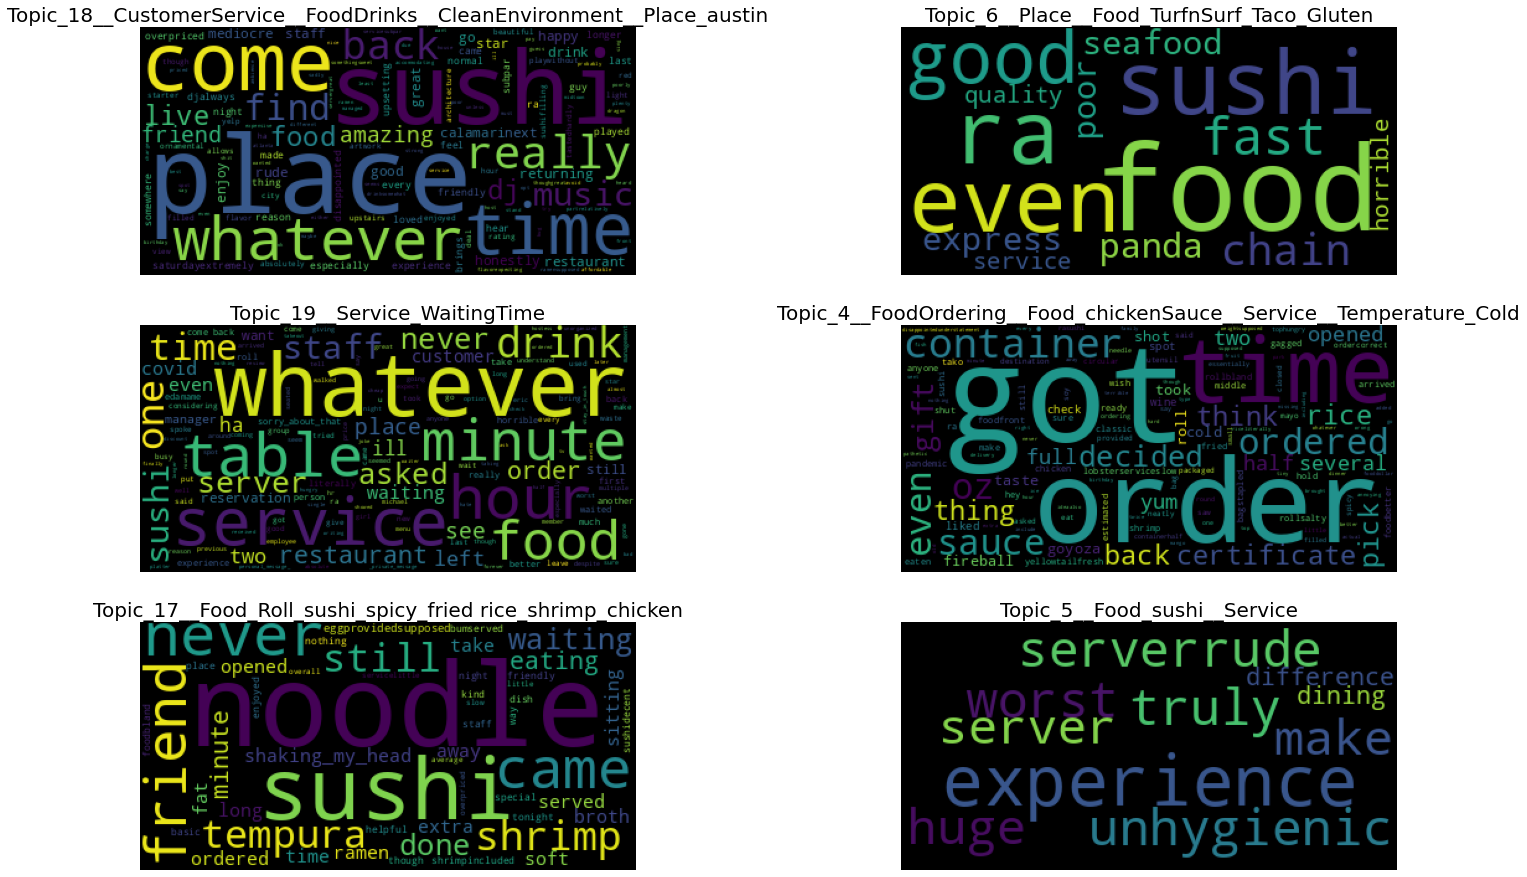

In [0]:
reviews_pdf=reviews_pdf[(reviews_pdf['date']>getArgument('start_date'))& (reviews_pdf['date']<getArgument('end_date'))]
test_df=reviews_pdf[reviews_pdf['stars']<=int(getArgument('stars_filter_below'))][reviews_pdf['stars']>=int(getArgument('stars_filter_above'))]
labels = test_df['dominant_topic_theme'].unique()
row, col = 3,2
wc = WordCloud(stopwords = STOPWORDS)
fig, ax = plt.subplots(3,2, figsize=(25,15))
for i in range(3):
    for j in range(2):
        c_type = labels[i*col+j]
        c_ax = ax[i][j]
        Reviews_pdf1 = test_df[test_df['dominant_topic_theme'] == c_type]
        wordc = wc.generate(Reviews_pdf1['text_syntatics_cleaned'].to_string())
        c_ax.imshow(wordc)
        c_ax.axis('off')
        c_ax.set_title(label=c_type,fontdict = {'fontsize': 20})
